# Riss 'rare diseases' 학술정보 스크래핑 data
- 방법 1) 주제어 뽑아서 topic 분류 후 지도학습 / 의미있는 topic분류가 안된다면
- 방법 2) 수동 분류 index 부여해서 지도학습

In [397]:
import pandas as pd
import numpy as np

In [398]:
df_Riss_research = pd.read_csv("./csv/Seleniums.eng_academic_research2.csv")
df_Riss_research.drop(labels='_id', axis=1, inplace=True)
df_Riss_research

,research_title,research_url,research_author,research_institution,research_name,research_volumn,research_year,research_language,research_subject,research_type,research_page
0,Collaboration through the Asia Pacific MPS Net...,https://www.riss.kr/link?id=A102412091,"Cho, Sung Yoon",Association for Research of MPS and Rare Diseases,Journal of mucopolysaccharidosis and rare disease,Vol.1 No.1 [2015],2015,English,Mucopolysaccharidosis ; Rare diseases ; APMN...,학술저널,
1,Journal of Mucopolysaccharidosis and Rare Dise...,https://www.riss.kr/link?id=A102412090,"Jin, Dong-Kyu",Association for Research of MPS and Rare Diseases,Journal of mucopolysaccharidosis and rare disease,Vol.1 No.1 [2015],2015,English,,학술저널,
2,Rare Presentation of an Uncommon Disease = Rar...,https://www.riss.kr/link?id=A108105268,( Vikas Marwah ) ; ( Shrinath Vasudevan ) ; ...,대한결핵 및 호흡기학회,Tuberculosis and Respiratory Diseases,Vol.85 No.2 [2022],2022,-,,학술저널,
3,Newborn Screening for Lysosomal Storage Diseas...,https://www.riss.kr/link?id=A103296772,"Lin, Hsiang-Yu ; Chuang, Chih-Kuang ; Lin, S...",Association for Research of MPS and Rare Diseases,Journal of mucopolysaccharidosis and rare disease,Vol.3 No.1 [2017],2017,English,Enzyme replacement therapy ; Fluorimetry ; H...,학술저널,
4,Newborn Screening of Lysosomal Storage Disease...,https://www.riss.kr/link?id=A103296779,"Kim, Su Jin",Association for Research of MPS and Rare Diseases,Journal of mucopolysaccharidosis and rare disease,Vol.3 No.1 [2017],2017,English,Newborn screening ; Lysosomal storage disease...,학술저널,
...,...,...,...,...,...,...,...,...,...,...,...
14656,종례 : 만성내장질환 환자에서 발생한 십이지장 및 공장의 허혈성 장염 1예 = Ca...,https://www.riss.kr/link?id=A60094700,김건민 ( Gun Min Kim ) ; 김용철 ( Yong Cheol Kim ) ...,대한내과학회,대한내과학회지 (The Korean Journal of Medicine),Vol.82 No.6 [2012],2012,-,내장순환 ; 허혈 ; 십이지장염 Splanchnic circulation ; ...,학술저널,
14657,Non-Tuberculous Mycobacterium Induced Pseudoan...,https://www.riss.kr/link?id=A103555339,이해영 (고신대학교) ; 조성호 (고신대학교) ; 김현수 (고신대학교 의과대학 ...,대한흉부외과학회,Journal of Chest Surgery (J Chest Surg)(The Ko...,Vol.49 No.6 [2016],2016,English,1. Carotid arteries 2. Infection 3. Nontubercu...,학술저널,
14658,장기간 항갑상선제 투여 후 임의 중단 뒤 재복용시 발생한 무과립구증 1 예 = A ...,https://www.riss.kr/link?id=A99535412,김승만;김태영;박수영;배영환;서영경 정은주;김태균;권민정;박정현;이순희 (인제대학교...,인제대학교,仁濟醫學(Inje medical journal),Vol.32 No.- [2011],2011,Korean,Agranulocytosis ; Antithyroid agents,학술저널,
14659,HCC : PE-073 ; Synchronous development of intr...,https://www.riss.kr/link?id=A100021711,( Kyung Hyun Cheon ) ; ( Kyu Sik Jung ) ; ( ...,대한간학회(The Korean Association for the Study of ...,춘·추계 학술대회 (KASL)(N/A),Vol.2012 No.1 [2012],2012,Korean,Hepatocellular carcinoma ; Intrahepatic chola...,학술저널,


# 방법 1) 주제어 뽑아서 topic 분류 후 지도학습

## 데이터 전처리

### dataframe 내 중복되는 학술정보 제거

In [399]:
df_Riss_research['research_title'].value_counts()

research_title
Clinical characterization of a Korean case with 3p25 deletion                                                         4
Diagnostic Tools of Pleural Effusion                                                                                  3
Identification of a novel frameshift mutation (L345Sfs*15) in a Korean neonate with methylmalonic acidemia            3
Squamous cell carcinoma of the maxillary sinus mimicking periodontitis                                                3
戶名을 통해 본 19세기 職役과 率下奴婢 = Occupations and Domestic Slaves Seen through the Practice of household title                 3
                                                                                                                     ..
비특이적 슬관절 활액막염에 의한 다발성 미립체 = A Case of Multiple Rice Bodies by the Nonspecific Synovitis in the Knee Joint             1
췌장에 전이된 폐 소세포암 = Metastatic Small Cell Carcinoma of the Pancreas Originating from the Lung                            1
스티븐스존슨증후군의 형태로 발생한 전신홍반루푸

In [400]:
df_Riss_research.drop_duplicates(subset="research_title", keep='first', inplace=True)
df_Riss_research['research_title'].value_counts()
# 중복값 제거 완료 확인

research_title
팬데믹 상황에서의 관계적 돌봄: 파킨슨증 아버지의 돌봄 사례를 중심으로                                                                                                                                                                                                                                                                                1
Collaboration through the Asia Pacific MPS Network (APMN), Asia Pacific MPS Registry (APMR), and Association for Research of MPS & Rare Diseases (ARMRD) = Collaboration through the Asia Pacific MPS Network (APMN), Asia Pacific MPS Registry (APMR), and Association for Research of MPS & Rare Diseases (ARMRD)    1
Journal of Mucopolysaccharidosis and Rare Diseases: Launch Editorial                                                                                                                                                                                                                                                   1
Rare Presentation of an Uncommon Disease = Rar

In [401]:
df_Riss_research.reset_index(drop=True, inplace=True)

### 영문 text만 남기기

In [402]:
import re
def no_korean(text):
    patterns = '([가-힣]|[一-龥]|[0-9]|[;])'
    text_regex = re.sub(pattern=patterns, repl="", string=text)
    return text_regex
df_Riss_research['research_subject'] = df_Riss_research['research_subject'].apply(no_korean)

### 대문자 -> 소문자

In [403]:
df_Riss_research['research_subject'] = df_Riss_research['research_subject'].str.lower()

### 불용어 제거

In [404]:
f=open('./csv/eng_academic_research_stopwords.txt')
stopwords=[]
lines = f.readlines()
for line in lines:
    line = line.strip()
    stopwords.append(line)
f.close()

### Tfidfvectorizer

In [405]:
eng_subject = df_Riss_research['research_subject'].tolist()
eng_subject

['mucopolysaccharidosis   rare diseases   apmn   apmr   armrd',
 ' ',
 ' ',
 'enzyme replacement therapy   fluorimetry   hematopoietic stem cell transplantation   lysosomal storage disease   newborn screening   tandem mass spectrometry',
 'newborn screening   lysosomal storage disease   mucopolysacchariodis',
 ' ',
 ' ',
 ' ',
 'skin barrier   filaggrin   atopic dermatitis   epidermolysis bullosa   keratin   genodermatoses',
 ' ',
 ' ',
 'idiopathic pulmonary fibrosis   interstitial pneumonia   pathological phenotype   progressive fibrosis',
 'adenocarcinoma   thymus   concurrent chemoradiotherapies',
 'solitary fibrous tumors   pleura   lipoma',
 'bronchial neoplasms   carcinoma   lung',
 ' ',
 'peritoneal dialysis   pleuroperitoneal communication   peritoneography   pleural effusion   pd catheter',
 ' ',
 'mucopolysaccharidoses   enzyme replacement therapy   indonesia   rare diseases',
 'intractable diseases   rare diseases   social media mining',
 'rare diseases   multi-omics   exom

In [406]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfVectorizer = TfidfVectorizer(stop_words=stopwords
                                  , ngram_range=(1,2)
                                  , max_df=0.90
                                  , min_df=2)  # stop_words는 vocabulary에서 필요없는 단어를 빼주는 것. ngram_range는 단어를 붙여주는 것으로 2개의 단어가 합성되었을때 의미를 가지고, 떨어져있을때 의미가 상실되는 경우를 포함함.
result_vectors = tfidfVectorizer.fit_transform(eng_subject)  # fit & transform은 다른 2가지 임.(fit하면 각 단어의 vocabulary 만들 수 있음.)
result_vectors.toarray()[:2]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [407]:
tfidfVectorizer.vocabulary_ 

{'mucopolysaccharidosis': 6873,
 'enzyme': 3443,
 'replacement': 9102,
 'therapy': 10342,
 'hematopoietic': 4574,
 'stem': 9895,
 'cell': 1738,
 'transplantation': 10640,
 'lysosomal': 6244,
 'storage': 9956,
 'newborn': 7380,
 'screening': 9436,
 'tandem': 10252,
 'mass': 6375,
 'spectrometry': 9769,
 'enzyme replacement': 3447,
 'replacement therapy': 9103,
 'hematopoietic stem': 4575,
 'stem cell': 9896,
 'cell transplantation': 1780,
 'lysosomal storage': 6245,
 'newborn screening': 7382,
 'tandem mass': 10253,
 'mass spectrometry': 6377,
 'skin': 9670,
 'barrier': 1063,
 'filaggrin': 3880,
 'atopic': 922,
 'dermatitis': 2804,
 'epidermolysis': 3490,
 'bullosa': 1439,
 'keratin': 5656,
 'genodermatoses': 4190,
 'skin barrier': 9672,
 'atopic dermatitis': 923,
 'epidermolysis bullosa': 3491,
 'idiopathic': 5032,
 'pulmonary': 8782,
 'fibrosis': 3860,
 'interstitial': 5399,
 'pneumonia': 8355,
 'pathological': 7983,
 'phenotype': 8167,
 'progressive': 8635,
 'idiopathic pulmonary': 5

### K-means & Elbow method 활용해서 최적 분류 수 찾기

In [408]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [409]:
# 클러스터 개수 범위 설정
min_clusters = 1
max_clusters = 10

In [410]:
# 각 클러스터 개수에 따른 SSE 값 저장
sse = []

In [411]:
# 클러스터링 수행 및 SSE 계산
for n_clusters in range(min_clusters, max_clusters+1):
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(result_vectors)
    sse.append(kmeans.inertia_)

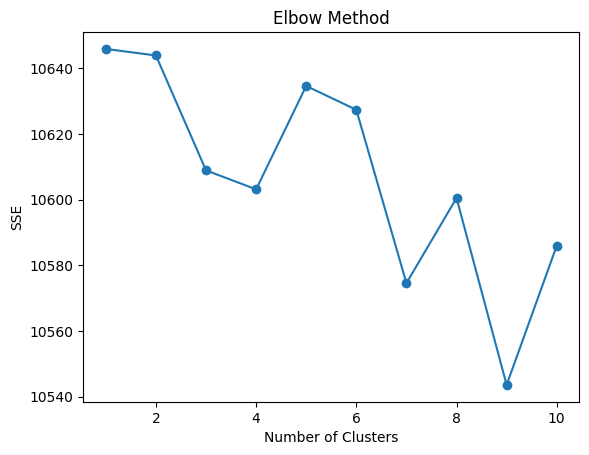

In [412]:
plt.plot(range(min_clusters, max_clusters+1), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()
# 유의미하지 않아 Prediction Strength로 최적군집수 재확인

In [413]:
from sklearn.metrics import pairwise_distances
from sklearn.utils import shuffle

In [414]:
def prediction_strength(X, n_clusters, n_runs=10):
    all_labels = []
    for _ in range(n_runs):
        # 데이터를 무작위로 섞음
        X_shuffled = shuffle(X, random_state=10)
        
        # K-means 클러스터링 실행
        kmeans = KMeans(n_clusters=n_clusters)
        labels = kmeans.fit_predict(X_shuffled)
        all_labels.append(labels)
    
    all_labels = np.array(all_labels)
    pairwise_similarities = pairwise_distances(all_labels, metric='jaccard')
    prediction_strengths = pairwise_similarities.mean(axis=0)
    
    return prediction_strengths

# 데이터
X = result_vectors

# Prediction Strength 계산
n_clusters = 5
strengths = prediction_strength(X, n_clusters)
print(strengths)

[0.01157872 0.00190267 0.0017895  0.00224218 0.00212901 0.00297779
 0.00224218 0.0017895  0.00269486 0.00184609]


/usr/local/lib/python3.11/site-packages/sklearn/metrics/pairwise.py:2317: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


### LDA : topic 모델링

In [415]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model = LatentDirichletAllocation(n_components=4, n_jobs=-1, random_state=10) # Prediction Strength로 확인한 최적 군집수 = 4
lda_model.fit(result_vectors)

LatentDirichletAllocation(n_components=4, n_jobs=-1, random_state=10)

In [416]:
dictionary_list = tfidfVectorizer.get_feature_names_out()
dictionary_list

array(['ab', 'abalone', 'abcb', ..., 'zosteriform', 'zygomatic', 'ﬂuid'],
      dtype=object)

In [417]:
lda_model.components_

array([[1.36178044, 0.2503957 , 0.25010614, ..., 1.43365477, 0.62288909,
        0.25222649],
       [0.25024626, 0.25031138, 0.25009176, ..., 0.28686227, 0.91708437,
        0.25323286],
       [0.25760207, 0.77206045, 1.42455216, ..., 0.2503586 , 0.25043706,
        0.25013461],
       [0.59642034, 0.71889438, 0.2524941 , ..., 0.25037667, 0.25078812,
        0.93487576]])

In [418]:
topics_output = lda_model.transform(result_vectors)
df_topics_score = pd.DataFrame(data=topics_output)
df_topics_score

,0,1,2,3
0,0.129425,0.616340,0.125691,0.128544
1,0.250000,0.250000,0.250000,0.250000
2,0.250000,0.250000,0.250000,0.250000
3,0.277828,0.199220,0.476275,0.046676
4,0.073620,0.073697,0.771835,0.080848
...,...,...,...,...
14133,0.049440,0.273448,0.621750,0.055363
14134,0.085211,0.087707,0.743453,0.083628
14135,0.061982,0.060844,0.064567,0.812607
14136,0.735096,0.083833,0.097090,0.083980


In [419]:
df_topics_score['dominant_topic_number'] = np.argmax(topics_output, axis=1)
df_topics_score['research_subject'] = df_Riss_research['research_subject']
df_topics_score

,0,1,2,3,dominant_topic_number,research_subject
0,0.129425,0.616340,0.125691,0.128544,1,mucopolysaccharidosis rare diseases apmn ...
1,0.250000,0.250000,0.250000,0.250000,0,
2,0.250000,0.250000,0.250000,0.250000,0,
3,0.277828,0.199220,0.476275,0.046676,2,enzyme replacement therapy fluorimetry hem...
4,0.073620,0.073697,0.771835,0.080848,2,newborn screening lysosomal storage disease ...
...,...,...,...,...,...,...
14133,0.049440,0.273448,0.621750,0.055363,2,hepatocellular carcinoma intrahepatic cholan...
14134,0.085211,0.087707,0.743453,0.083628,2,splanchnic circulation ischemia duo...
14135,0.061982,0.060844,0.064567,0.812607,3,. carotid arteries . infection . nontuberculou...
14136,0.735096,0.083833,0.097090,0.083980,0,agranulocytosis antithyroid agents


### topic별 word 추출

In [420]:
topics_list = list()
for topic in lda_model.components_:
    df_datas = [topic, dictionary_list]
    df_topics = pd.DataFrame(data=df_datas)
    df_topics= df_topics.T
    df_topics = df_topics.sort_values(0, ascending=False)
    topics_text = ' '.join(df_topics[1].values[:5])
    print(topics_text)
    topics_list.append(topics_text)

topics_list_add = [topics_list, ['Topic0', 'Topic1', 'Topic2']]
df_topics_keywords = pd.DataFrame(topics_list_add)

cell lung arthritis leukemia graves
liver renal pulmonary acute kidney
breast lupus systemic erythematosus lupus erythematosus
lymphoma cell carcinoma tumor fistula


In [421]:
df_topics_keywords

,0,1,2,3
0,cell lung arthritis leukemia graves,liver renal pulmonary acute kidney,breast lupus systemic erythematosus lupus eryt...,lymphoma cell carcinoma tumor fistula
1,Topic0,Topic1,Topic2,None


### LDA 시각화

In [422]:
import pyLDAvis
import pyLDAvis.lda_model

In [423]:
vis = pyLDAvis.lda_model.prepare(lda_model, result_vectors, tfidfVectorizer)

In [424]:
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

### topic 분류별 data 수

In [425]:
pivot_table = pd.pivot_table(data=df_topics_score,
               values='research_subject',
               index='dominant_topic_number',
               aggfunc='count')

In [426]:
pivot_table

,research_subject
dominant_topic_number,
0,5853
1,3257
2,2606
3,2422
